In [8]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,20123568,Caucasian,Female,75,1,22,7,7,MC,Orthopedics-Reconstructive,...,9,No,No,No,Up,No,Steady,Ch,Yes,0
1,20377854,Caucasian,Female,65,2,1,1,3,MC,Nephrology,...,6,No,No,No,No,No,Steady,No,Yes,0
2,20408121,Caucasian,Female,95,1,1,7,4,MC,Emergency/Trauma,...,6,No,No,No,No,No,No,No,Yes,0
3,20542797,Caucasian,Male,75,1,2,7,10,MC,InternalMedicine,...,6,Steady,No,No,No,No,Steady,Ch,Yes,0
4,7239654,Caucasian,Female,75,1,3,6,12,UN,InternalMedicine,...,5,No,No,No,No,No,Steady,No,Yes,0


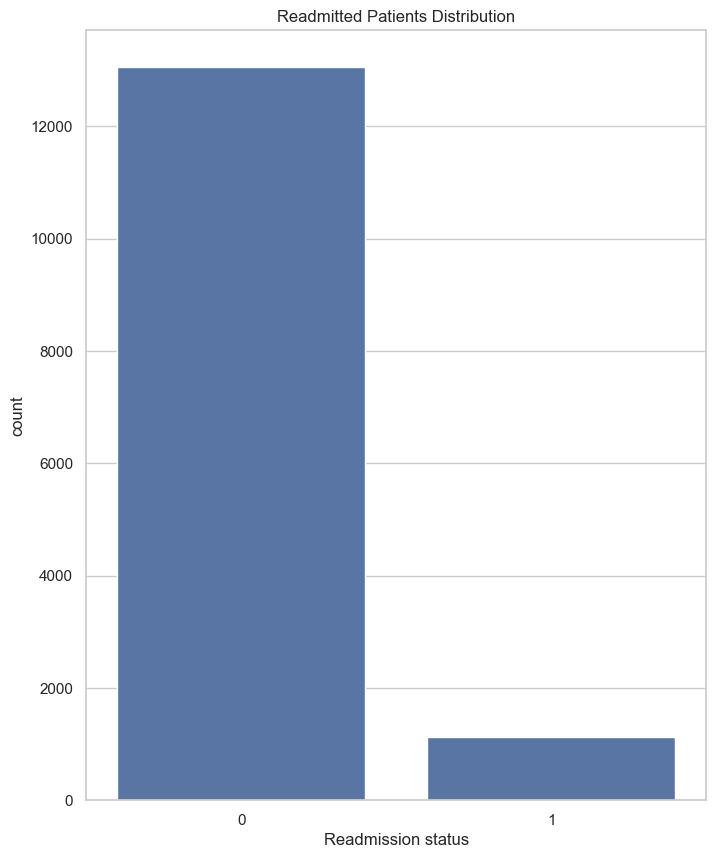

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,10))
sns.countplot(data=df,x='readmitted')
plt.title('Readmitted Patients Distribution')
plt.xlabel('Readmission status')
plt.ylabel('count')
plt.show()

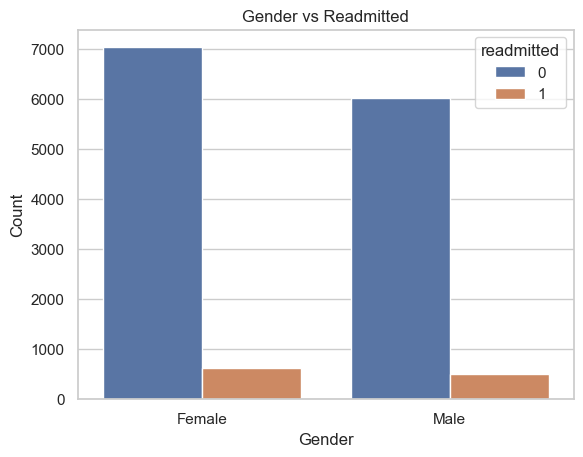

In [15]:
sns.countplot(data=df, x='gender', hue='readmitted')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Readmitted')
plt.show()

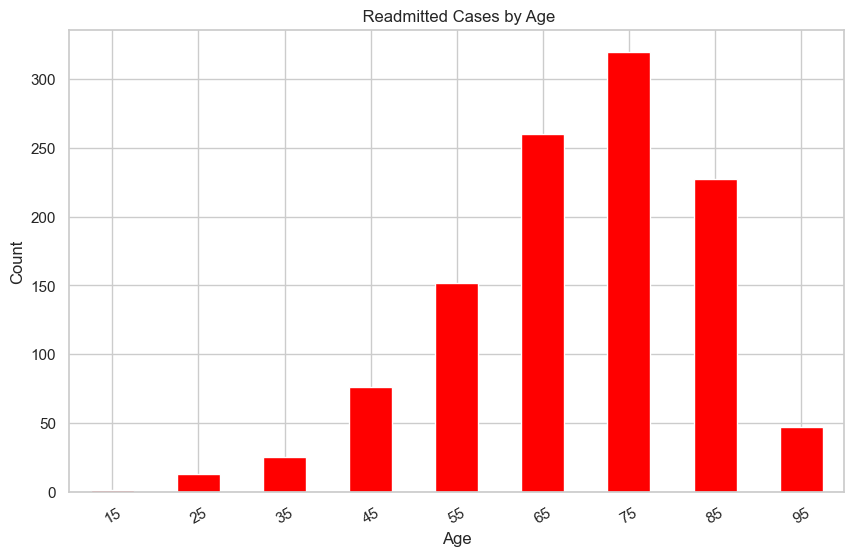

In [17]:
readmitted_df = df[df['readmitted'] == 1]

# Grouping by age and count of readmitted cases
age_readmitted_counts = readmitted_df['age'].value_counts().sort_index()

# Plotting
age_readmitted_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title(' Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [18]:
print("Readmitted Cases by Age:")
print(age_readmitted_counts)

Readmitted Cases by Age:
age
15      1
25     13
35     25
45     76
55    152
65    260
75    320
85    227
95     47
Name: count, dtype: int64


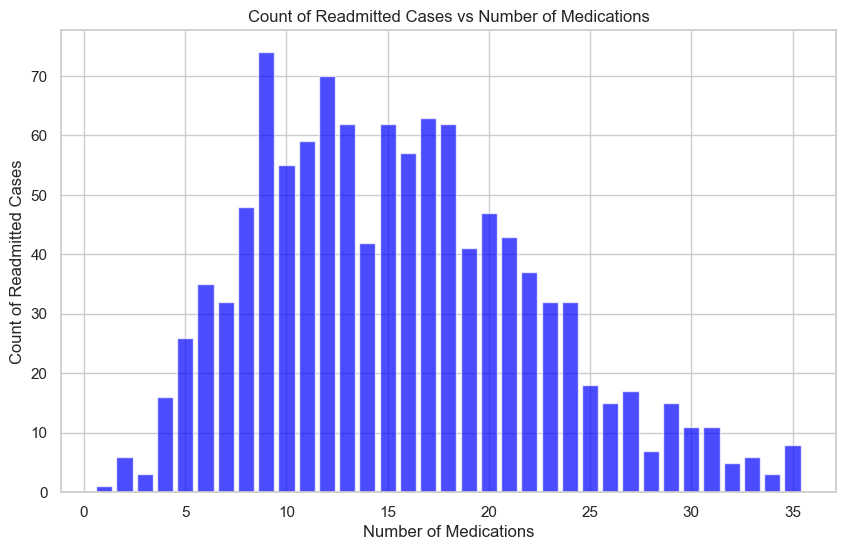

In [19]:
# Filtering data for cases where 'readmitted' is '1'
readmitted_df = df[df['readmitted'] == 1]

# Grouping by number of medications and counting occurrences
medication_counts = readmitted_df['num_medications'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(medication_counts.index, medication_counts.values, color='blue', alpha=0.7)
plt.xlabel('Number of Medications')
plt.ylabel('Count of Readmitted Cases')
plt.title('Count of Readmitted Cases vs Number of Medications')
plt.grid(True)
plt.show()

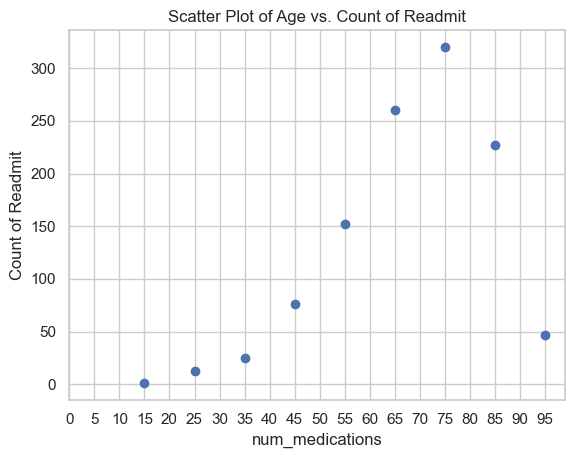

In [20]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['age'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Age vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()

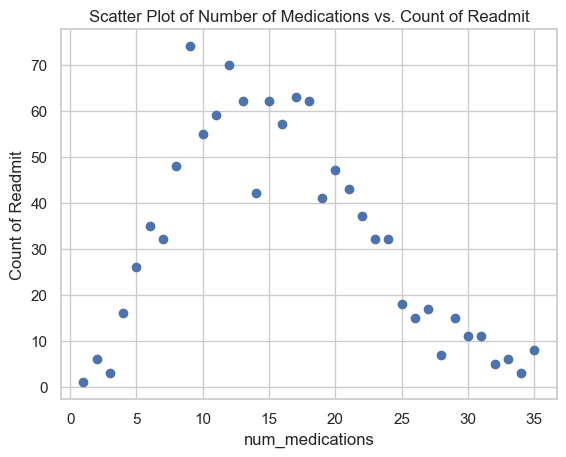

In [21]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['num_medications'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Number of Medications vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()

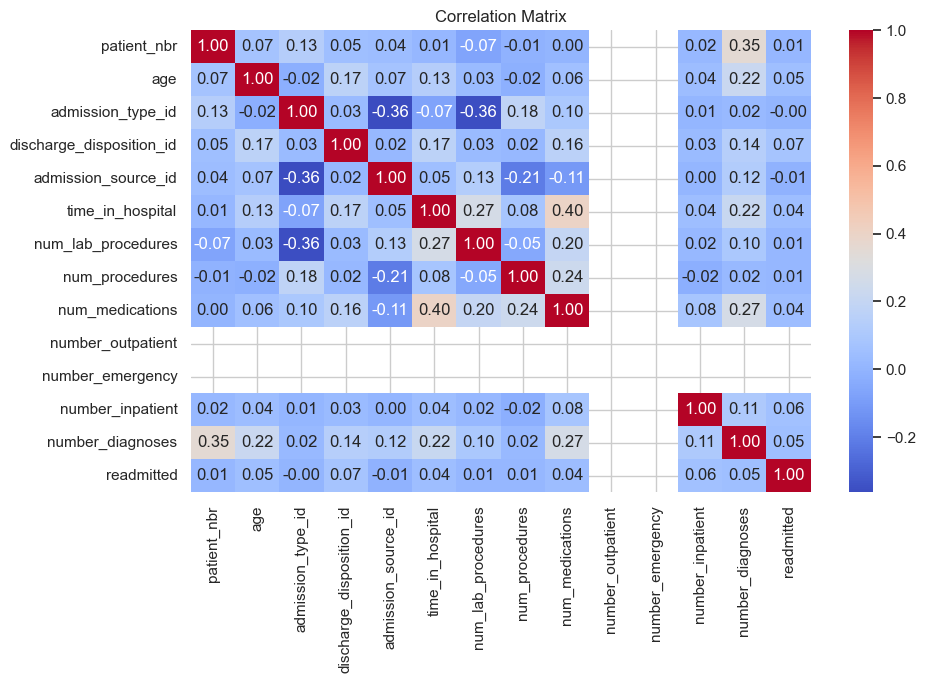

In [23]:
num_df = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()